In [128]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Load the CSV files
results_bab = pd.read_csv('resultsBAB.csv')
results_dp = pd.read_csv('resultsDP.csv')
results_eh = pd.read_csv('resultsEH.csv')
results_fa = pd.read_csv('resultsFA.csv')
results_sh = pd.read_csv('resultsSH.csv')



In [130]:
print(results_bab.head())

print(results_dp.head())

print(results_eh.head())

print(results_fa.head())

print(results_sh.head())

    n type  runtime_microseconds
0   4   NK                   341
1  10   NK                  4626
2  15   NK                 39350
3  20   NK                316389
4  22   NK                922676
    n type  runtime_microseconds
0   4   NK                252580
1  10   NK               1957338
2  15   NK               4691900
3  20   NK               8903080
4  22   NK              11154590
    n type  measured_time_nanoseconds  average_error  maximum_error
0   4   NK                    1019846        85.4589           1752
1  10   NK                    3007277       236.2810           2093
2  15   NK                    5181491       271.7090           1753
3  20   NK                    8692858       313.3810           2084
4  22   NK                    9717291       344.3150           2247
    n type  epsilon  measured_time_microseconds  average_error  maximum_error
0  40   NK     0.01                    70459431       0.000206       0.002136
1  40   NK     0.05                    1

In [131]:
results_sh['measured_time_microseconds'] = results_sh['measured_time_nanoseconds'] / 1000
results_sh.drop(columns=['measured_time_nanoseconds'], inplace=True)

In [132]:
results_eh['measured_time_microseconds'] = results_eh['measured_time_nanoseconds'] / 1000
results_eh.drop(columns=['measured_time_nanoseconds'], inplace=True)

In [133]:
results_bab.rename(columns={'runtime_microseconds': 'measured_time_microseconds'}, inplace=True)


In [134]:
results_dp.rename(columns={'runtime_microseconds': 'measured_time_microseconds'}, inplace=True)

In [135]:
print(results_bab.head())

print(results_dp.head())

print(results_eh.head())

print(results_fa.head())

print(results_sh.head())

    n type  measured_time_microseconds
0   4   NK                         341
1  10   NK                        4626
2  15   NK                       39350
3  20   NK                      316389
4  22   NK                      922676
    n type  measured_time_microseconds
0   4   NK                      252580
1  10   NK                     1957338
2  15   NK                     4691900
3  20   NK                     8903080
4  22   NK                    11154590
    n type  average_error  maximum_error  measured_time_microseconds
0   4   NK        85.4589           1752                    1019.846
1  10   NK       236.2810           2093                    3007.277
2  15   NK       271.7090           1753                    5181.491
3  20   NK       313.3810           2084                    8692.858
4  22   NK       344.3150           2247                    9717.291
    n type  epsilon  measured_time_microseconds  average_error  maximum_error
0  40   NK     0.01                    7

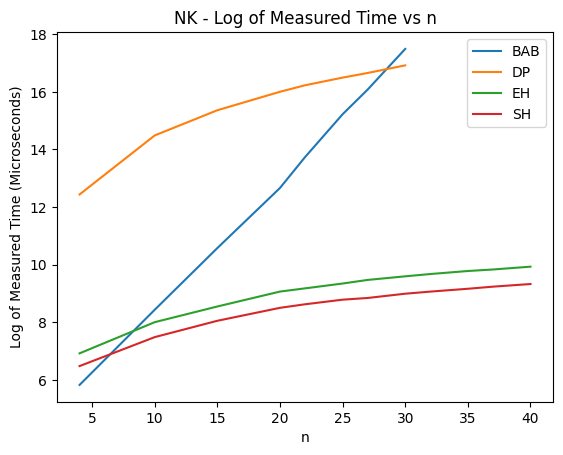

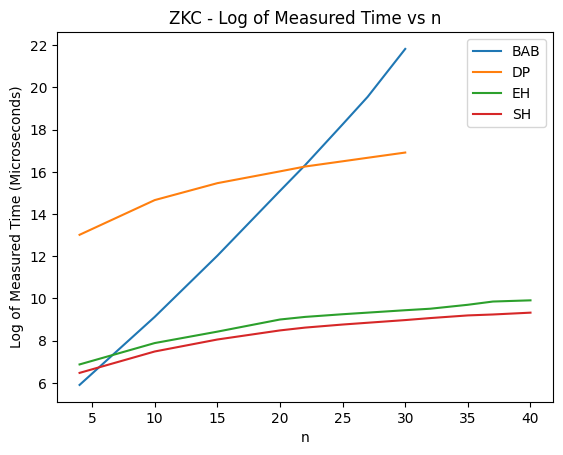

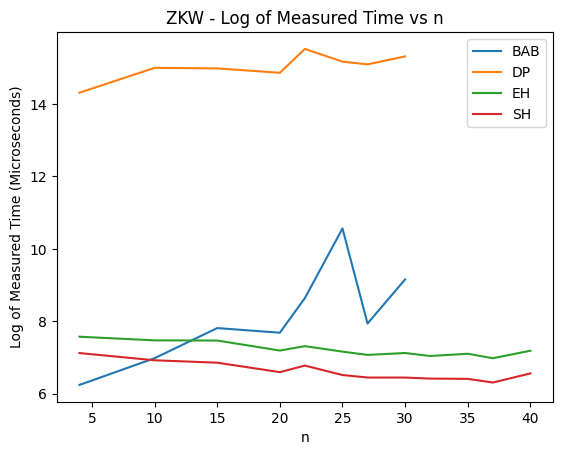

In [136]:
types = ['NK', 'ZKC', 'ZKW']

for t in types:
    # Filter the data by type
    filtered_bab = results_bab[results_bab['type'] == t].copy()
    filtered_dp = results_dp[results_dp['type'] == t].copy()
    filtered_eh = results_eh[results_eh['type'] == t].copy()
    filtered_sh = results_sh[results_sh['type'] == t].copy()

    # Apply logarithmic transformation
    filtered_bab.loc[:, 'log_measured_time_microseconds'] = np.log(filtered_bab['measured_time_microseconds'])
    filtered_dp.loc[:, 'log_measured_time_microseconds'] = np.log(filtered_dp['measured_time_microseconds'])
    filtered_eh.loc[:, 'log_measured_time_microseconds'] = np.log(filtered_eh['measured_time_microseconds'])
    filtered_sh.loc[:, 'log_measured_time_microseconds'] = np.log(filtered_sh['measured_time_microseconds'])

    # Plot the data
    plt.figure()
    plt.plot(filtered_bab['n'], filtered_bab['log_measured_time_microseconds'], label='BAB')
    plt.plot(filtered_dp['n'], filtered_dp['log_measured_time_microseconds'], label='DP')
    plt.plot(filtered_eh['n'], filtered_eh['log_measured_time_microseconds'], label='EH')
    plt.plot(filtered_sh['n'], filtered_sh['log_measured_time_microseconds'], label='SH')
    plt.xlabel('n')
    plt.ylabel('Log of Measured Time (Microseconds)')
    plt.title(f'{t} - Log of Measured Time vs n')
    plt.legend()

    plt.savefig(f'{t}_runtime.png')

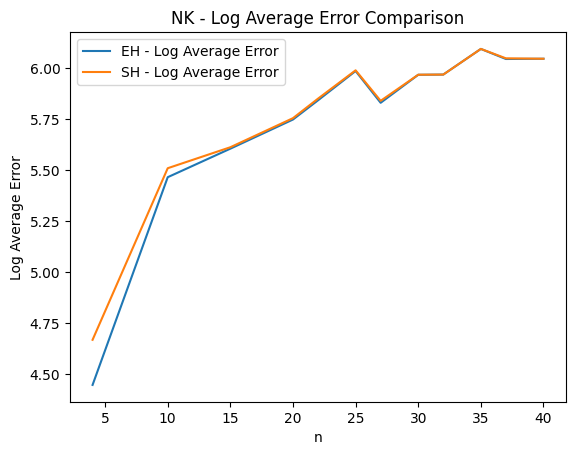

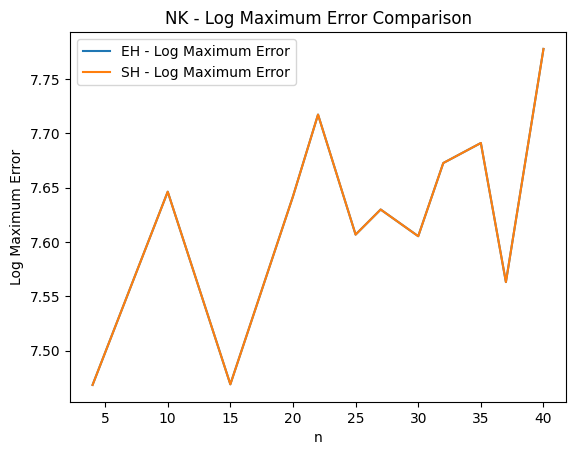

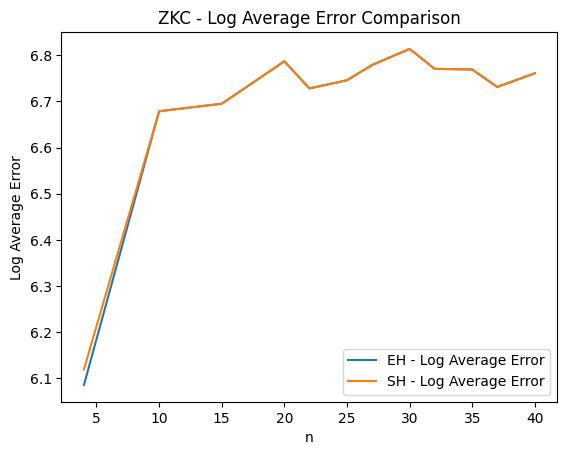

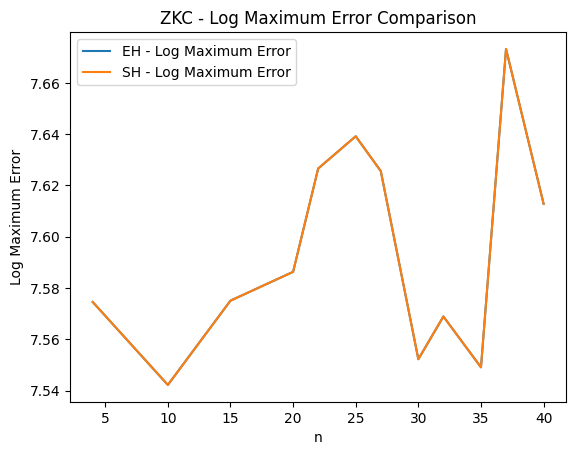

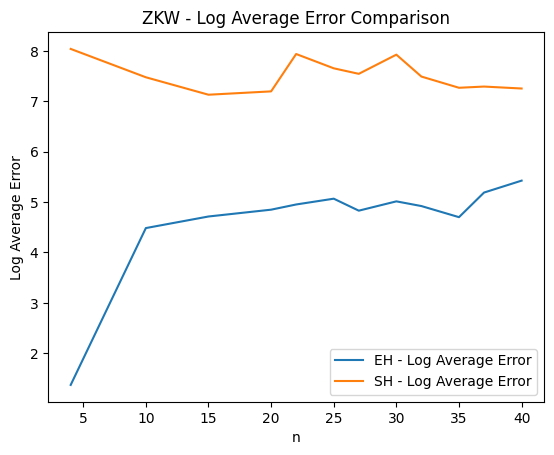

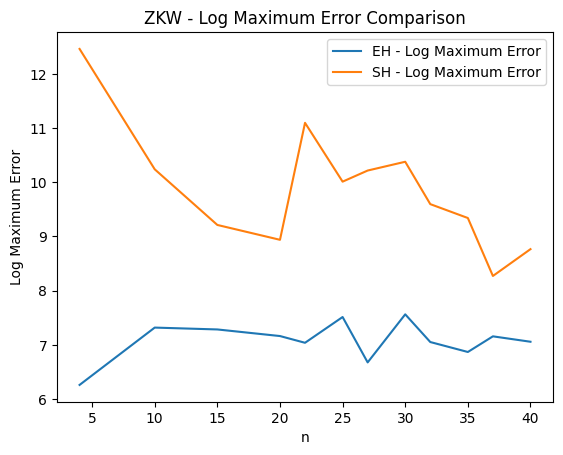

In [137]:
for t in types:
    # Filter the data by type
    filtered_eh = results_eh[results_eh['type'] == t].copy()
    filtered_sh = results_sh[results_sh['type'] == t].copy()

    # Apply logarithmic transformation
    filtered_eh['log_average_error'] = np.log(filtered_eh['average_error'])
    filtered_sh['log_average_error'] = np.log(filtered_sh['average_error'])
    filtered_eh['log_maximum_error'] = np.log(filtered_eh['maximum_error'])
    filtered_sh['log_maximum_error'] = np.log(filtered_sh['maximum_error'])

    # Plot the average errors
    plt.figure()
    plt.plot(filtered_eh['n'], filtered_eh['log_average_error'], label='EH - Log Average Error')
    plt.plot(filtered_sh['n'], filtered_sh['log_average_error'], label='SH - Log Average Error')
    plt.xlabel('n')
    plt.ylabel('Log Average Error')
    plt.title(f'{t} - Log Average Error Comparison')
    plt.legend()
    plt.savefig(f'{t}_log_average_error_comparison.png')

    # Plot the maximum errors
    plt.figure()
    plt.plot(filtered_eh['n'], filtered_eh['log_maximum_error'], label='EH - Log Maximum Error')
    plt.plot(filtered_sh['n'], filtered_sh['log_maximum_error'], label='SH - Log Maximum Error')
    plt.xlabel('n')
    plt.ylabel('Log Maximum Error')
    plt.title(f'{t} - Log Maximum Error Comparison')
    plt.legend()
    plt.savefig(f'{t}_log_maximum_error_comparison.png')

plt.show()

    n type  epsilon  measured_time_microseconds  average_error  maximum_error
0  40   NK     0.01                    70459431       0.000206       0.002136
1  40   NK     0.05                    13746574       0.001040       0.013430
2  40   NK     0.10                     6507797       0.002113       0.033161
3  40   NK     0.20                     3371819       0.004129       0.052893
4  40   NK     0.50                     1353664       0.010159       0.124681
     n type  epsilon  measured_time_microseconds  average_error  maximum_error
6   40  ZKC     0.01                    79134444       0.000262       0.000368
7   40  ZKC     0.05                    15273390       0.001316       0.001929
8   40  ZKC     0.10                     7901011       0.002621       0.004073
9   40  ZKC     0.20                     3320024       0.005215       0.008399
10  40  ZKC     0.50                     1329629       0.012720       0.019036
     n type  epsilon  measured_time_microseconds  average_

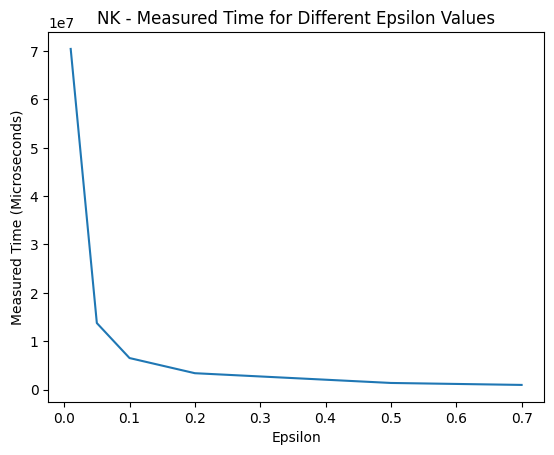

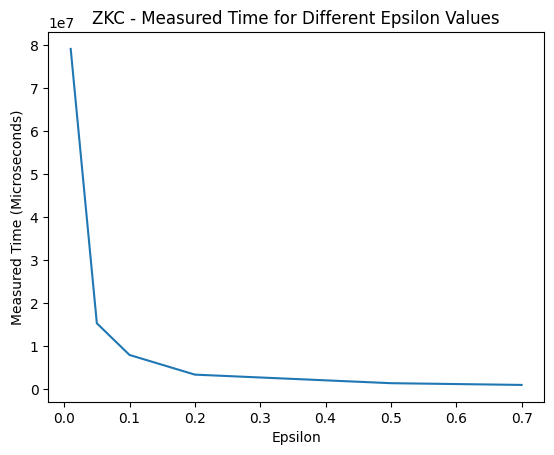

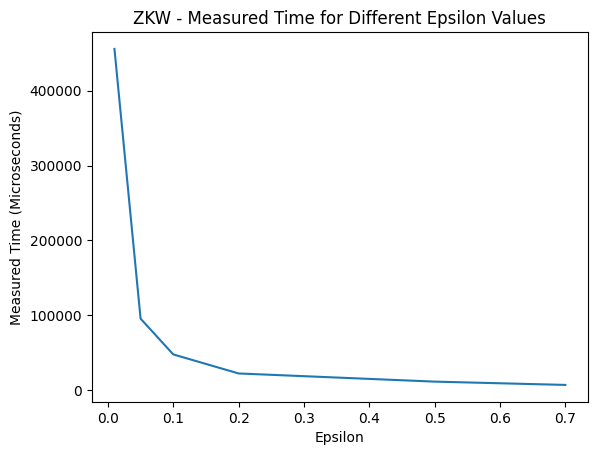

In [145]:
epsilon_values = results_fa['epsilon'].unique()

for t in types:
    filtered_fa = results_fa[results_fa['type'] == t].copy()
    print(filtered_fa.head())
    
    # Plot runtime comparison
    plt.figure()
    plt.plot(filtered_fa['epsilon'], filtered_fa['measured_time_microseconds'])
    plt.xlabel('Epsilon')
    plt.ylabel('Measured Time (Microseconds)')
    plt.title(f'{t} - Measured Time for Different Epsilon Values')
    plt.savefig(f'{t}_measured_time_fptas.png')

plt.show()

    n type  epsilon  measured_time_microseconds  average_error  maximum_error
0  40   NK     0.01                    70459431       0.000206       0.002136
1  40   NK     0.05                    13746574       0.001040       0.013430
2  40   NK     0.10                     6507797       0.002113       0.033161
3  40   NK     0.20                     3371819       0.004129       0.052893
4  40   NK     0.50                     1353664       0.010159       0.124681
     n type  epsilon  measured_time_microseconds  average_error  maximum_error
6   40  ZKC     0.01                    79134444       0.000262       0.000368
7   40  ZKC     0.05                    15273390       0.001316       0.001929
8   40  ZKC     0.10                     7901011       0.002621       0.004073
9   40  ZKC     0.20                     3320024       0.005215       0.008399
10  40  ZKC     0.50                     1329629       0.012720       0.019036
     n type  epsilon  measured_time_microseconds  average_

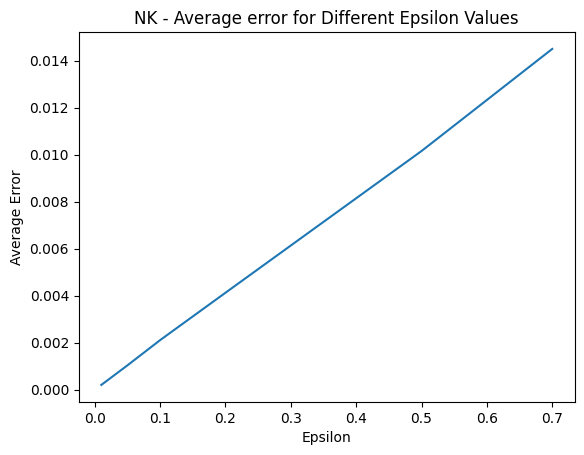

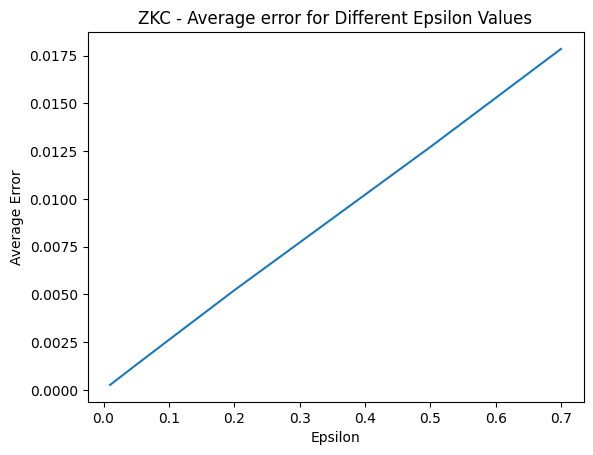

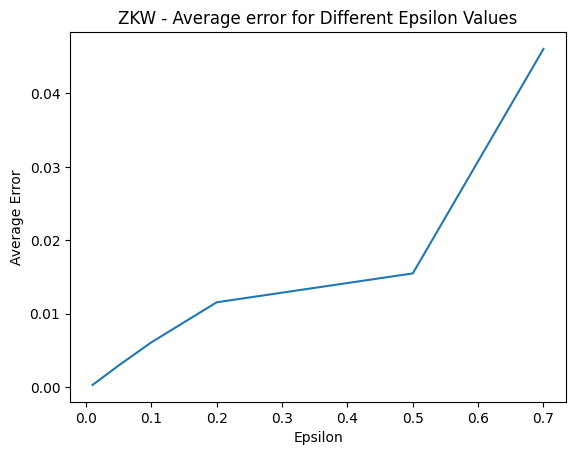

In [146]:
for t in types:
    filtered_fa = results_fa[results_fa['type'] == t].copy()
    
    # Plot runtime comparison
    plt.figure()
    plt.plot(filtered_fa['epsilon'], filtered_fa['average_error'])
    plt.xlabel('Epsilon')
    plt.ylabel('Average Error')
    plt.title(f'{t} - Average error for Different Epsilon Values')
    plt.savefig(f'{t}_average_error_fptas.png')

plt.show()

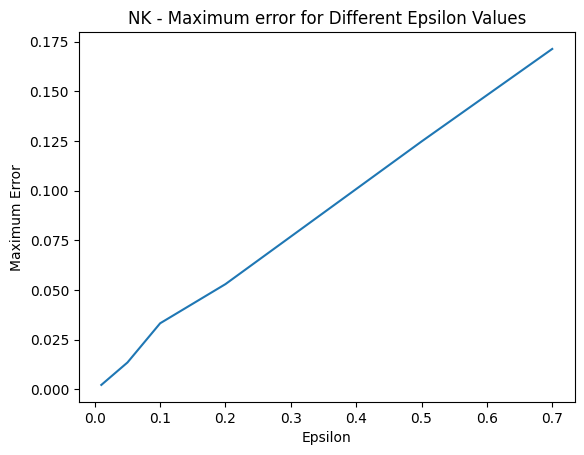

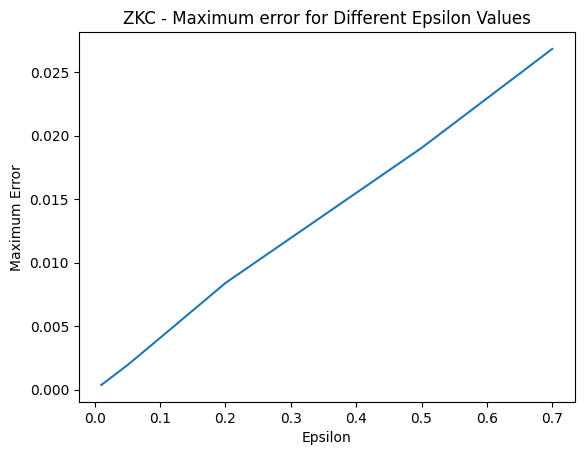

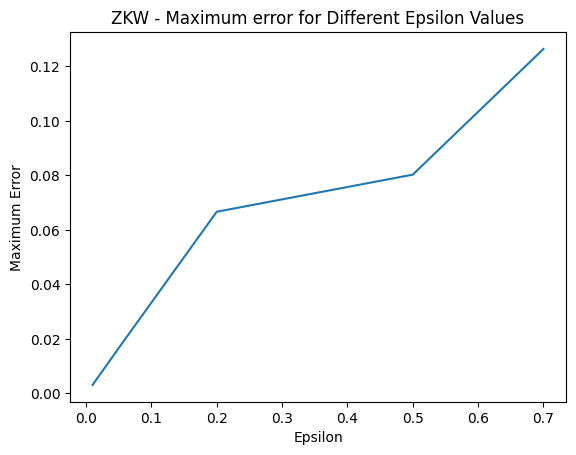

In [147]:
for t in types:
    filtered_fa = results_fa[results_fa['type'] == t].copy()
    
    # Plot runtime comparison
    plt.figure()
    plt.plot(filtered_fa['epsilon'], filtered_fa['maximum_error'])
    plt.xlabel('Epsilon')
    plt.ylabel('Maximum Error')
    plt.title(f'{t} - Maximum error for Different Epsilon Values')
    plt.savefig(f'{t}_maximum_error_fptas.png')

plt.show()